In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import itertools

In [35]:

# Инициализация списков для хранения данных
result_title = []
result_price = []
result_year = []
result_milliage = []

# Счетчик неудачных запросов
fail_counter = 0 

# Диапазон страниц для парсинга
page_counter = range(1, 36)

# Определяем webdriver selenium
driver = webdriver.Chrome()

# Функция для очистки текста цен
def clean_price(text):
    # Убираем символы и переводим в число
    price_str = ''.join(filter(str.isdigit, text))
    return int(price_str) if price_str else None

# Функция для очистки текста пробега
def clean_mileage(text):
    return int(''.join(filter(str.isdigit, text[:7])))

# Время ожидания для загрузки страницы
delay = 2

try:
    for i in page_counter:
        driver.get(f"https://auto.ru/rossiya/cars/kia/k5/22462291/used/?page={i}")
        
        # Ожидание, чтобы страница полностью загрузилась
        time.sleep(delay)
        
        titles = driver.find_elements(By.XPATH, "//a[@class='Link ListingItemTitle__link']")
        prices = driver.find_elements(By.XPATH, "//div[@class='ListingItem__priceBlock']")
        years = driver.find_elements(By.XPATH, "//div[@class='ListingItem__yearBlock']")
        milliages = driver.find_elements(By.XPATH, "//div[@class='ListingItem__kmAge']")
        
        if titles:
            list_title = [title.text[:-10].strip() for title in titles if title.text.strip()]
            list_price = [clean_price(price.text.split('₽')[0]) for price in prices if price.text.strip()]
            list_year = [int(year.text.strip()) for year in years if year.text.strip()]
            list_milliage = [clean_mileage(mill.text) for mill in milliages if mill.text.strip()]

            result_title.extend(list_title)
            result_price.extend(list_price)
            result_year.extend(list_year)
            result_milliage.extend(list_milliage)
        else:
            fail_counter += 1

finally:
    # Закрываем браузер после выполнения задач
    driver.quit()

# Создание DataFrame из собранных данных
df = pd.DataFrame({
    'model': result_title,
    'price': result_price,
    'year': result_year,
    'milliage': result_milliage
})

# Вывод DataFrame
print(df)

     model    price  year  milliage
0           2200000  2020     34128
1           2930000  2021    113000
2           3550000  2021     68000
3           2560000  2021     47265
4           2693000  2021     67833
...    ...      ...   ...       ...
1290        2200000  2021     10000
1291        1980000  2020     30000
1292        2206000  2021     74000
1293        2900000  2020     47000
1294        1800000  2020     78000

[1295 rows x 4 columns]


In [36]:
fail_counter

0

In [37]:
df

,model,price,year,milliage
0,,2200000,2020,34128
1,,2930000,2021,113000
2,,3550000,2021,68000
3,,2560000,2021,47265
4,,2693000,2021,67833
...,...,...,...,...
1290,,2200000,2021,10000
1291,,1980000,2020,30000
1292,,2206000,2021,74000
1293,,2900000,2020,47000


In [38]:
minn =  df['price'].min()
maxx =  df['price'].max()
median = df['price'].median()
avg = round(df['price'].mean(),1)
#mode = df['price'].mode()
std = round(df['price'].std(),1)
print(f" price is - max {maxx}, min {minn}, median {median}, avg {avg}, std {std}")

 price is - max 4599000, min 1700000, median 2800000.0, avg 2792336.6, std 509910.4


In [39]:
group_year = df.groupby(['year'], as_index=False).agg(cnt_on_group=('year', 'count'), avg_price = ('price', 'mean'), median_price = ('price', 'median'), maxx=('price', 'max'), minn=('price', 'min'), std=('price', 'std'))
group_year['avg_price'] = group_year['avg_price'].round()
group_year['std'] = group_year['std'].round()
group_year

,year,cnt_on_group,avg_price,median_price,maxx,minn,std
0,2019,20,2747537.0,2817000.0,3749000,1750000,508502.0
1,2020,495,2654406.0,2695000.0,4100000,1700000,460704.0
2,2021,648,2777663.0,2800000.0,4100000,1700065,455882.0
3,2022,103,3261343.0,3300000.0,4540000,1950001,473135.0
4,2023,26,3838549.0,3898500.0,4599000,2951000,457409.0
5,2024,3,3849333.0,3750000.0,4099000,3699000,217716.0


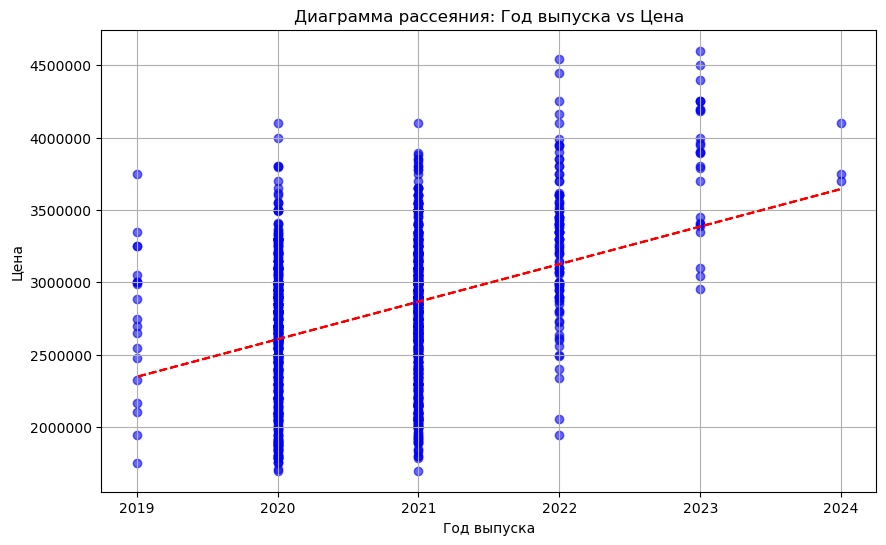

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['price'], color='blue', alpha=0.6)

# Добавление подписей и заголовков
plt.title('Диаграмма рассеяния: Год выпуска vs Цена')
plt.xlabel('Год выпуска')
plt.ylabel('Цена')

# Настройка масштабирования осей
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y')  # Делаем так, чтобы ось y отображала большие числа корректно

# Опционально: Добавление трендовой линии
z = np.polyfit(df['year'], df['price'], 1)
p = np.poly1d(z)
plt.plot(df['year'], p(df['year']), "r--")

# Показ графика
plt.grid(True)
plt.show()

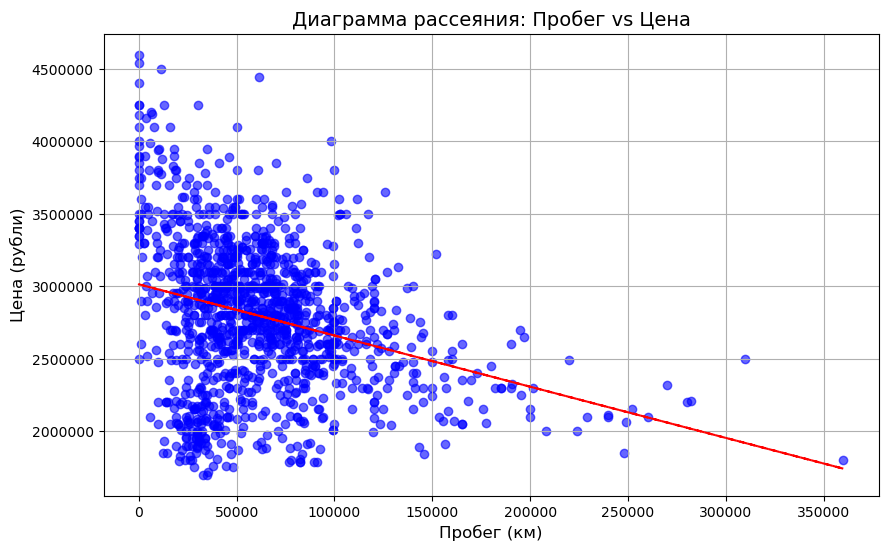

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(df['milliage'], df['price'], color='blue', alpha=0.6)

# Добавление подписей и заголовков
plt.title('Диаграмма рассеяния: Пробег vs Цена', fontsize=14)
plt.xlabel('Пробег (км)', fontsize=12)
plt.ylabel('Цена (рубли)', fontsize=12)

# Настройка масштабирования осей
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y')  # Делаем так, чтобы ось y отображала большие числа корректно

# Опционально: Добавление трендовой линии
z = np.polyfit(df['milliage'], df['price'], 1)
p = np.poly1d(z)
plt.plot(df['milliage'], p(df['milliage']), "r--")

# Показ графика
plt.grid(True)
plt.show()

In [50]:
one = df[(df['year'] == 2020) & (df['milliage']<=60000)]
one

,model,price,year,milliage
0,,2200000,2020,34128
14,,3619000,2020,22161
16,,2480000,2020,34938
18,,3335000,2020,29514
21,,2599000,2020,40610
...,...,...,...,...
1273,,2600000,2020,31000
1280,,3300000,2020,41000
1289,,3000000,2020,45000
1291,,1980000,2020,30000


In [56]:
sec = one.groupby(['year'], as_index=False).agg(exp_price = ('price', 'mean'))
sec['exp_price'] = sec['exp_price'].round()
sec

,year,exp_price
0,2020,2642978.0
